## Machine Learning

### Topic: Heart Disease Risk Detection

**Introduction**

A heart attack is a medical emergency that usually occurs when a blood clot blocks blood flow to the heart. Without blood, tissue loses
oxygen and dies. According to the CDC, In the United States, someone has a heart attack every 40 seconds. Every year, about 805,000
people in the United States have a heart attack. Of these, 605,000 are a first heart attack 200,000 happen to people who have already
had a heart attack. About 1 in 5 heart attacks is silent—the damage is done, but the person is not aware of it. Using the following
dataset, we will take an exploratory look at the factors that lead to heart attacks and try to predict which are the biggest culp

## Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
import plotly.graph_objects as go
import plotly.express as px
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Dataset

In [4]:
 df = pd.read_csv("D:\IBM_Data_Science\Data_set\Data_set\heart.csv")

## Variable Description

**Age:** Age of patient

**Sex:** Sex of patient

**Cp:** Type of chest pain:

 Value (0): typical angina
 
 Value (1): atypical angina
 
 Value (2): non-anginal pain
 
 Value (3): asymptomatic
 
**trtbps:** resting blood pressure (in mm Hg)

**chol:** cholestorol levels measured in mg/dl

**fbs:** (fasting blood sugar > 120 mg/dl (Diabetic))

 Value (0): false
 
 Value (1): true
 
**restecg:** resting electrocardiographic results

 Value (0): normal
 
 Value (1): heart showing some abnormalities
 
 Value (2): Left Ventricular Hypertrophy (a term for a heart's left pumping chamber that has thickened and may not be pumpingefficiently).

**thalachh:** Maximum heart rate achieved

**exng:** exercise induced angina

 Value (0): no
 
 Value (1): yes
 
**oldpeak:** ST depression induced by exercise relative to rest. (ST depression is a type of abnormality. the ST segment is the flat, isoelectric part of the ECG and it represents the interval between ventricular depolarization and repolarization)

**slp:** the slope of the peak exercise ST segment

 Value (0): upsloping
 
 Value (1): flat
 
 Value (2): downslope
 
**caa:** The number of major vessels

**thall:** thalassemia (an inherited blood disorder that causes your body to have less hemoglobin than normal)  

Value (0): silent carrier;

One gene is missing or damaged, this means you don’t have signs of the disease, but you can pass the damaged gene on to your child

 Value (1): carrier; Two genes are missing. You may have mild anemia.
 
 Value (2): Hemoglobin H disease; Three genes are missing, you may have moderate to severe anemia. Blood transfusions are often
needed.  You have a greater risk of having a child with alpha thalassemia major.

 Value (3): Alpha thalassemia major; All 4 genes are missing. This causes severe anemia. In most cases, a baby with this condition will
die before  birth.

**output:** diagnosis of heart disease

 Value (0): lower risk of heart disease
 
 Value (1): higher risk of heart disease

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Analysis

In [6]:
print("The shape of the dataset is :", df.shape)


The shape of the dataset is : (303, 14)


In [7]:
## Check null value
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

- Luckily, we do not have any missing values

**Descriptive Statictis Analysitic**

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


- The mean age of the observations is 54 with the average participant having Hemoglobin H disease as shown in the 'thall' column men
also appear to make up the majority of the observations and a little more than half of the participants are at risk of heart disease

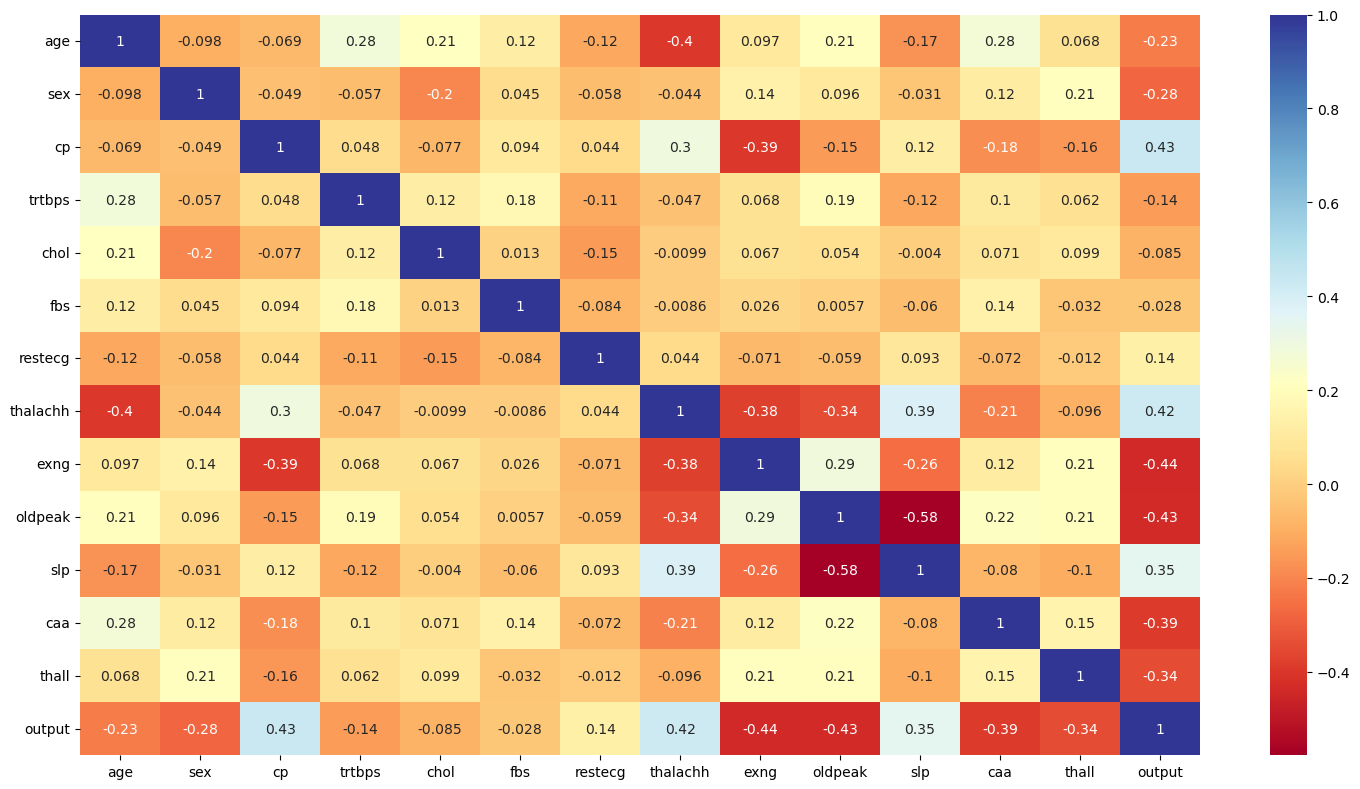

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='RdYlBu',annot=True)
plt.tight_layout()

- Not many of the variables have a direct correlation with the output columns. The three highest correlated variables are chest pain(cp),
maximum heart rate achieved (thalachh), and the slope of the ST depression (slp)

In [10]:
categorical = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous = ["age","trtbps","chol","thalachh","oldpeak"]
target = ["output"]
print("The categorial variables are : ", categorical)
print("The continuous variables are : ", continuous)
print("The target variable is : ", target)

The categorial variables are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous variables are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :  ['output']


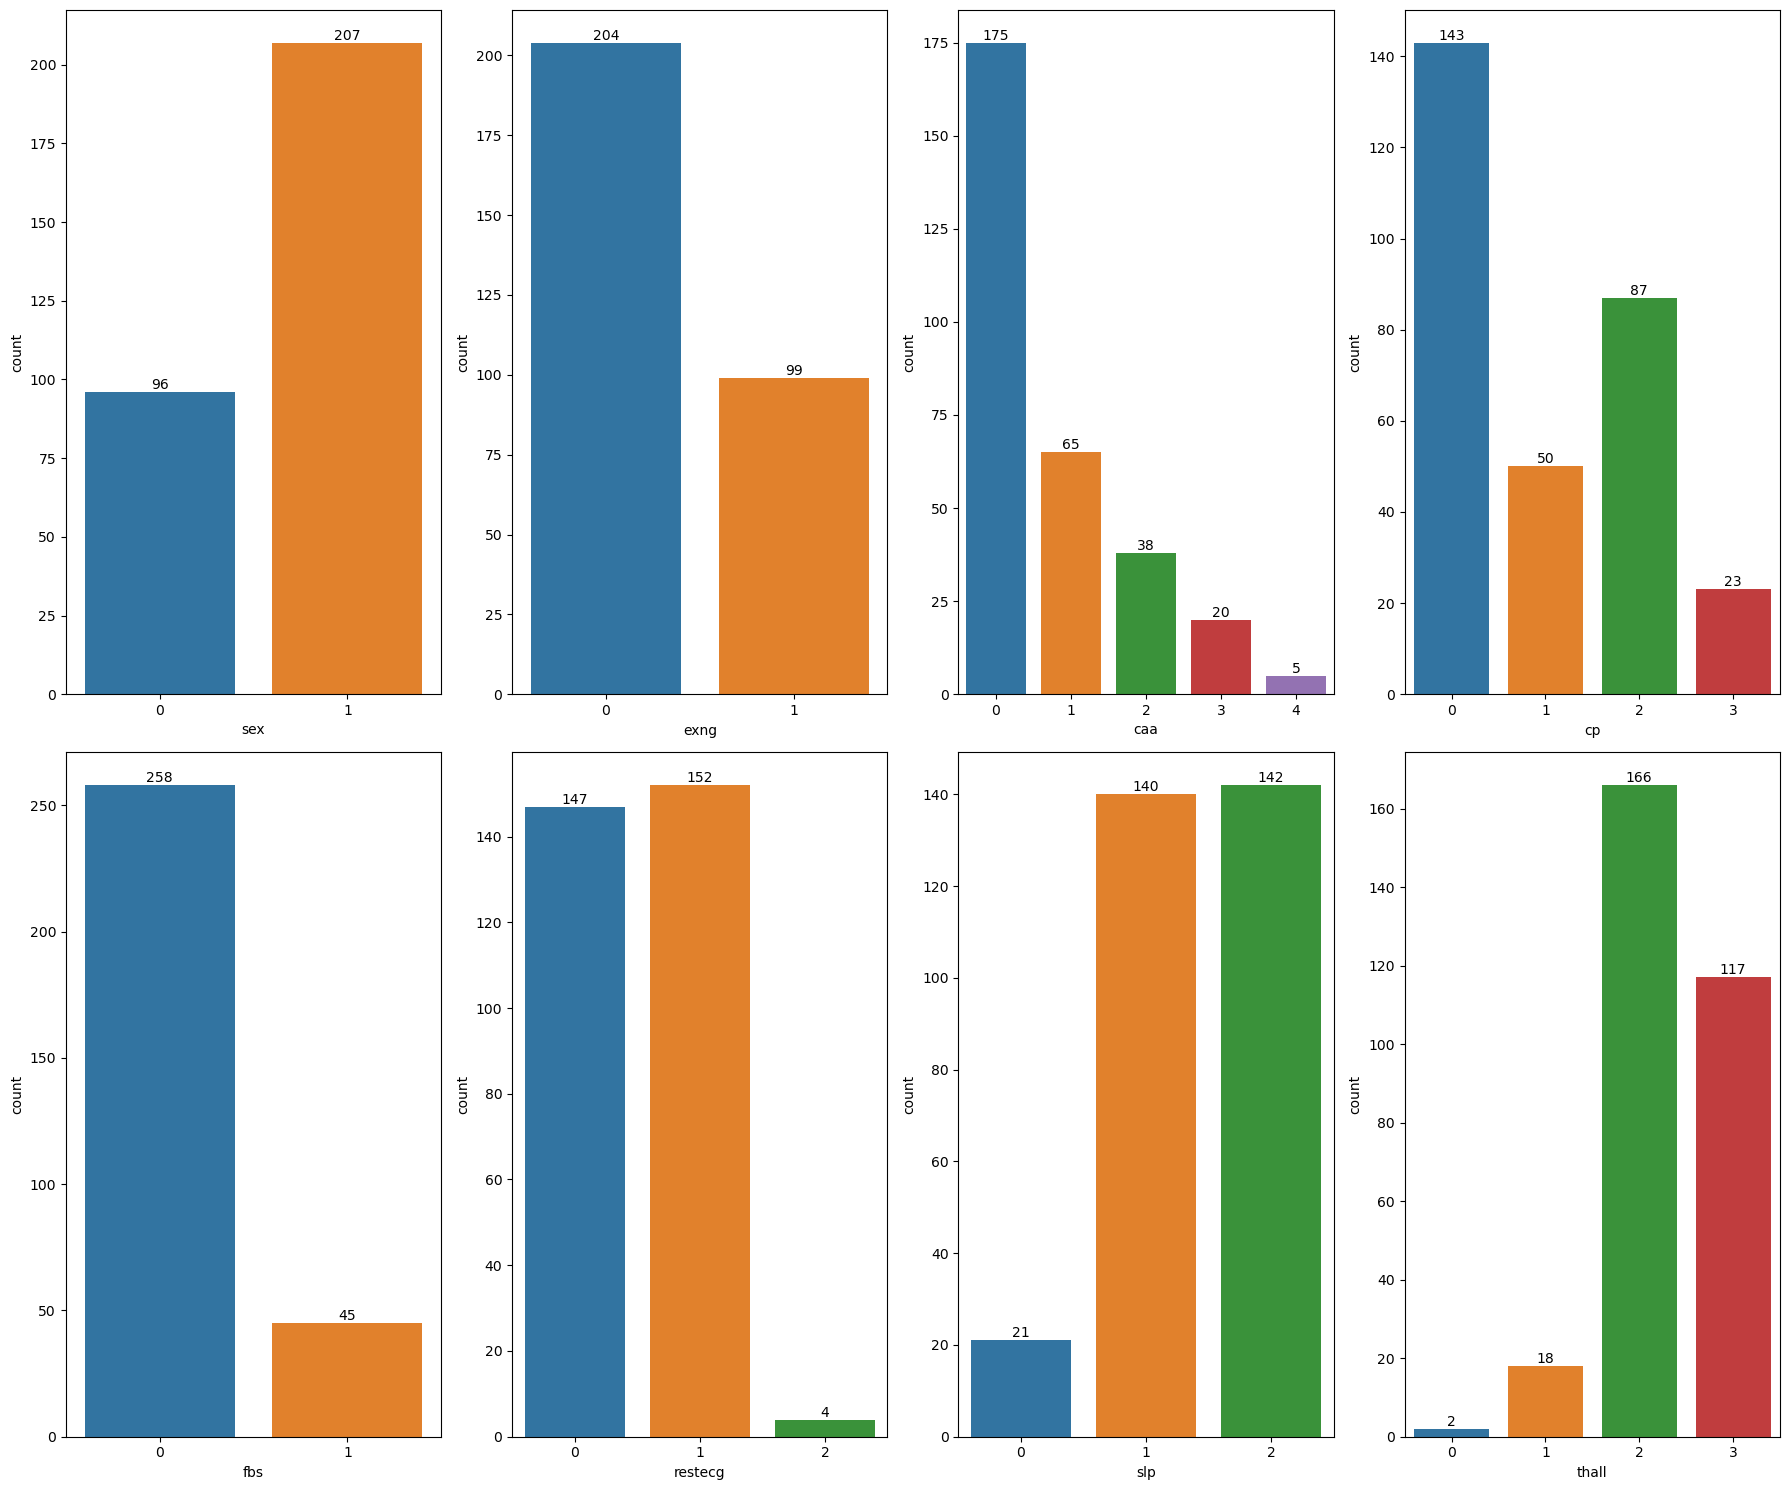

In [11]:
fig = plt.figure(figsize=(18,15))
grid = fig.add_gridspec(2,4)

ax0 = fig.add_subplot(grid[0,0])
sns.countplot(data=df, x=categorical[0], ax=ax0)
ax0.bar_label(ax0.containers[0])

ax1 = fig.add_subplot(grid[0,1])
sns.countplot(data=df, x=categorical[1], ax=ax1)
ax1.bar_label(ax1.containers[0])

ax2 = fig.add_subplot(grid[0,2])
sns.countplot(data=df, x=categorical[2], ax=ax2)
ax2.bar_label(ax2.containers[0])

ax3 = fig.add_subplot(grid[0,3])
sns.countplot(data=df, x=categorical[3], ax=ax3)
ax3.bar_label(ax3.containers[0])

ax4 = fig.add_subplot(grid[1,0])
sns.countplot(data=df, x=categorical[4], ax=ax4)
ax4.bar_label(ax4.containers[0])

ax5 = fig.add_subplot(grid[1,1])
sns.countplot(data=df, x=categorical[5], ax=ax5)
ax5.bar_label(ax5.containers[0])

ax6 = fig.add_subplot(grid[1,2])
sns.countplot(data=df, x=categorical[6], ax=ax6)
ax6.bar_label(ax6.containers[0])

ax7 = fig.add_subplot(grid[1,3])
sns.countplot(data=df, x=categorical[7], ax=ax7)
ax7.bar_label(ax7.containers[0])
plt.tight_layout()

- Above we can see the total value counts for each categorical variable. Men make up the overwhelming majority of the observations,
more than doubling the amount of women. Most participants do not have exercise induced angina specifically (exng) but a majority do
have typical anginal pain (1). Most particpants are not diabetic (fbs) but most do seem to contain Hemoglobin H disease (thall) which is
represented by the value (2)

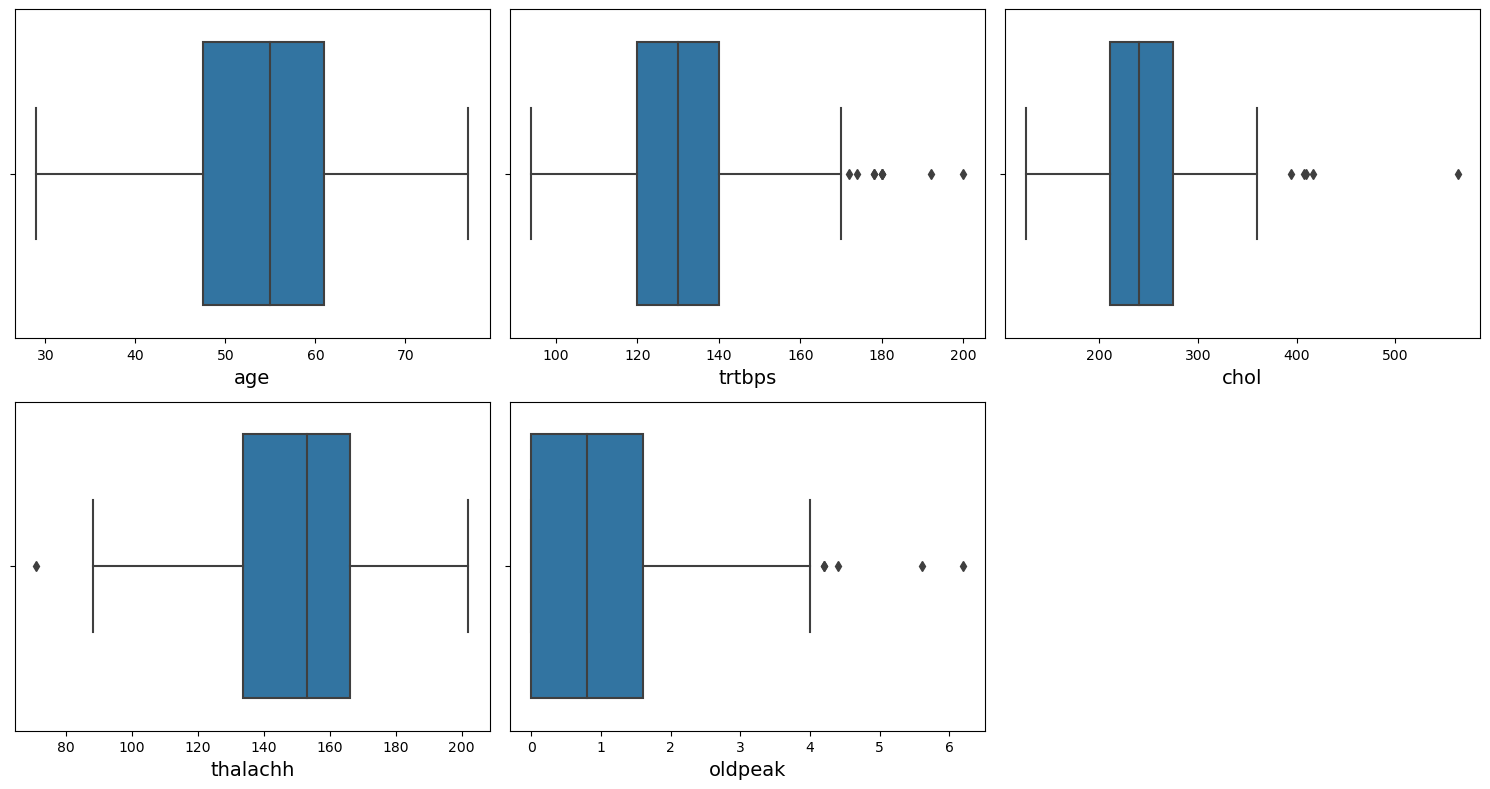

In [12]:
fig = plt.figure(figsize=(15,8))
grid = fig.add_gridspec(2,3)

ax0 = fig.add_subplot(grid[0,0])
sns.boxplot(data=df, x=continuous[0], ax=ax0)
ax0.set_xlabel('age', fontsize=14)

ax1 = fig.add_subplot(grid[0,1])
sns.boxplot(data=df, x=continuous[1], ax=ax1)
ax1.set_xlabel('trtbps', fontsize=14)

ax2 = fig.add_subplot(grid[0,2])
sns.boxplot(data=df, x=continuous[2], ax=ax2)
ax2.set_xlabel('chol', fontsize=14)

ax3 = fig.add_subplot(grid[1,0])
sns.boxplot(data=df, x=continuous[3], ax=ax3)
ax3.set_xlabel('thalachh', fontsize=14)

ax4 = fig.add_subplot(grid[1,1])
sns.boxplot(data=df, x=continuous[4], ax=ax4)
ax4.set_xlabel('oldpeak', fontsize=14)

plt.tight_layout()


- These boxplots show is the distribution of the continuous variables. There are outliers for resting blood pressure(trbps), cholesterol and oldpeak. There is also one lower outerliers for max heat rate (thalachh)

[Text(0, 0, '138'), Text(0, 0, '165')]

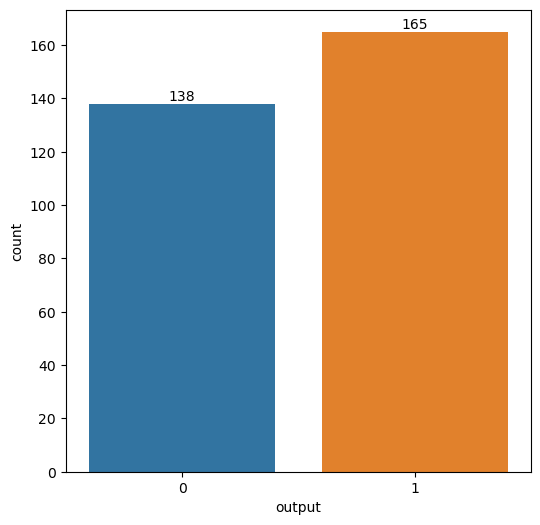

In [13]:
fig = plt.figure(figsize=(6,6))
out = sns.countplot(x='output', data=df)
out.bar_label(out.containers[0])

165 of the participartns are at risk of heart disease

## Split and Scale 

Before continuing we will build a function to plot a cofussion matrix for each model built..

In [14]:
def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)    
    ax= plt.subplot()
    sns.heatmap(cm, cmap='Spectral',annot=True, ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['No risk', 'At risk']); ax.yaxis.set_ticklabels(['No risk', 'At risk'])

In [15]:
X = df.drop(['output'],axis = 1)
Y= df['output']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=101)

Since we do have some outliers among our continous variables we will use the RobustScaler to scale them. This scales features using
statistics that are robust to outliers by removing the median and scaling the data according to the interquartile range. The IQR is the
range between the 1st quartile (25th percentile) and the 3rd quartile (75th percentile)

In [17]:
scaler=preprocessing.RobustScaler()
X_train[continuous]=scaler.fit_transform(X_train[continuous])
X_test[continuous]=scaler.transform(X_test[continuous])

In [18]:
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)
print("The shape of Y_train is:", Y_train.shape)
print("The shape of Y_test is:", Y_test.shape)

The shape of X_train is: (212, 13)
The shape of X_test is: (91, 13)
The shape of Y_train is: (212,)
The shape of Y_test is: (91,)


## Building Models

### Logistic Regression 

In [19]:
import warnings 
warnings.filterwarnings("ignore")

In [20]:
lr=LogisticRegression()
lr_params={'C':[0.01,0.1,1],
            'penalty':['l1','l2','elasticnet'],
            'solver':['liblinear','lbfgs']}

In order to ensure that our models are as accurate as possible, we will tune hyperparameters using the dictionary above named lr_params and provide multiple options for each.

Hyperparameters are different parameter values that are used to control the learning process and have a significant effect on the performance of machine learning models. With that being said, hyperparameter optimization is the process of finding the right combination of hyperparameter values to achieve maximum performance on the data in a reasonable amount of time. This process
plays a vital role in the prediction accuracy of a machine learning algorithm.

For our Logistic Regression model we will tune the **C**, **penalty**, and **solver** hyperparameters ... - **C** is the inverse of regularization strength, meaning that regularization is increased by making the number smaller and this is usually tuned in powers of 10 as shown. - **penalty** refers to the imposition of a penalty to the logistic model for having too many variables. 

This results in shrinking the coefficients of the less contributive variables toward zero or even zero. This is also known as regularization. - **solver**
refers to the algorithm to be used in the optimization problem.

We will use the GridSearchCV feature which performs an exhaustive search of all possible combinations of the specified parameter values for each estimator, in this case Logistic Regression, in order to build the best model possible

In [21]:
logreg_cv= GridSearchCV(lr,lr_params,cv=5)
logreg_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs']})

In [22]:
print("Best Parameters :", logreg_cv.best_params_)
print("GridSearch Accuracy :",(logreg_cv.best_score_*100).round(2),"%")

Best Parameters : {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearch Accuracy : 83.98 %


Now that we have run the GridSearch on our training data, we can see that the best parameters for our log regression are 1 for C, l2 for penalty, and liblinear for solver.

- The 1 for C parameter means that the strength of regularization is on the weaker side since this was the highest option given, perhaps because we already scaled our features prior.
- l2 for penalty parameter means a ridge regression algorithm was used to regularize the data. This combats the overfitting by forcing weights to be small, but not making them exactly zero.
- liblinear for solver refers, as stated, to the optimization algorithm. Liblinear is more efficient with smaller datasets and mostly useful for one-vs-rest problems, both of which apply to our dataset.

This combination of parameters produced an acccuracy of 82.22% based off of our training data

In [23]:
y_predict=logreg_cv.predict(X_test)

print("Logistic Regression model accuracy:",
    ( accuracy_score(Y_test, y_predict)*100).round(2),'%')

Logistic Regression model accuracy: 84.62 %


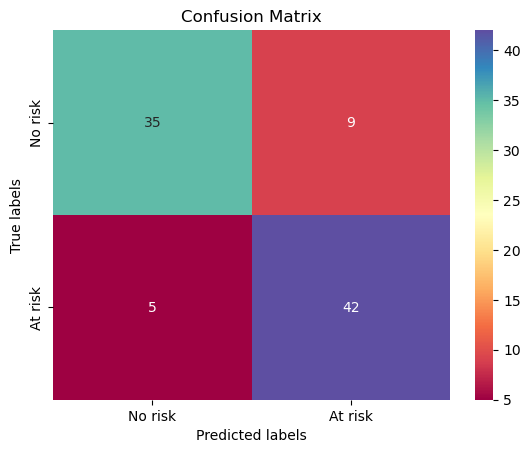

In [24]:
plot_confusion_matrix(Y_test,y_predict)

- When using our new optimized Log Regression to make predictions on our test data, meaning data that the algorithm has yet to see,
we find that it predicts risk of heart attack at a rate of 85.25%, making 52 correct predictions out of 61 as shown in the confusion
matrix above.

## Support Vector Machine

In [25]:
svm = SVC()
svm_params = {'C':[0.01,0.1,1],
                'kernel':['linear', 'rbf','poly','sigmoid'],
                'degree':[2,3,4,5],
                'gamma':[0.01,0.1,1.0]}

For our Support Vector Classifier we created the svm_params dictionary to tune the hyperparameters. The parameters for Support
Vector Machines are a little different than that of the Log Regression but, likewise, work to optimize our algorithm and give us the
most accurate model possible.


For our Support Vector Classifier we will tune the **C**, **kernel**,**degree**,and **gamma** hyperparameters ... - **C** is the inverse
of the regularization strength, same as in the Log Regression model above. - **kernel** refers to the type of hyperplane used to
seperate the data. - **degree** refers to the degree of the 'poly' (polynomial) kernel and is ignored by all other kernels. - **gamma**
defines how far the influence of a single training example reaches, with low values meaning 'far' from the hyperplane and high values
meaning 'close

In [26]:
svm_cv=GridSearchCV(svm,svm_params,cv=5)
svm_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'degree': [2, 3, 4, 5],
                         'gamma': [0.01, 0.1, 1.0],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [27]:
print('Best Parameters :',svm_cv.best_params_)
print("GridSearch Accuracy :",(svm_cv.best_score_*100).round(2),'%')

Best Parameters : {'C': 0.01, 'degree': 2, 'gamma': 1.0, 'kernel': 'poly'}
GridSearch Accuracy : 83.02 %


Now that we have run the GridSearch on our training data, we can see that the best parameters for our Support Vector Machine are 0.01 for C, poly for kernel, 2 for degree, and 1.0 for gamma
- The 0.01 for C parameter means that the strength of regularization is on the stronger end since this was the lowest option given.poly for the kernel parameter means the model distinguishes curved or nonlinear input space.

- 2 for degree refers, as stated, to the degree of the polynomial kernel since that was selected as the best kernel.

- 1 for gamma means that the algorithm will consider points closer to the decision boundary(hyperplane) as this was the highest option. This parameter only works with non-linear kernels.

- This combination of parameters produced an acccuracy of 82.64% based off of our training data

In [28]:
y_predict=svm_cv.predict(X_test)

print("Support Vector model accuracy:",
( accuracy_score(Y_test, y_predict)*100).round(2),'%')

Support Vector model accuracy: 86.81 %


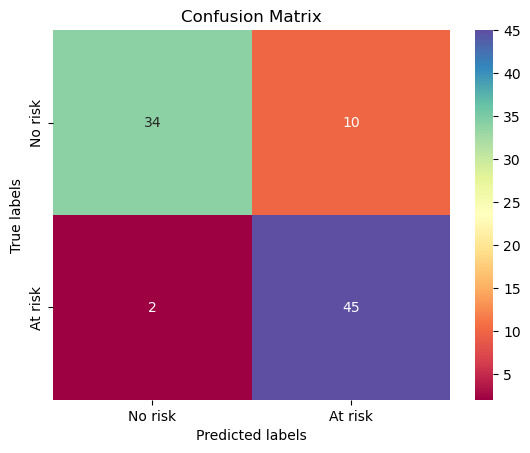

In [29]:
plot_confusion_matrix(Y_test,y_predict)

When using our newly optimized Support Vector Machine to make predictions on our test data, we find that it predicts risk of heart
attack at an 86.89% rate, making 53 correct predictions out of 61 as shown in the confusion matrix above. One more than our Log
Regression Model

## Decision Tree

In [30]:
tree = DecisionTreeClassifier()
tree_params = {'criterion':['gini','entropy','log_loss'],
                'splitter': ['best', 'random'],
                'max_depth': ['None',2, 4, 6, 8],
                'min_samples_split': [2, 4, 6, 8, 10],
                'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                'max_features': ['auto', 'sqrt','log2']}

The parameters dictionary for tuning our Decision Tree model will be named tree_params as shown above. As we can see, this model
has a few more parameters to tune than the previous two.


- **criterion** is the function that measures the quality of a split. It determines how a decision tree chooses to split data. - **splitter**
refers to the strategy used to choose the split at each node. - **max_depth** is the maximum depth of the tree. - **min_samples_split**
is the minimum number of samples required to split an internal node. - **min_samples_leaf** is the minimum number of samples
required to be at a leaf node. - **max_features** is the maximum number of features to consider when looking for the best split

In [31]:
tree_cv = GridSearchCV(tree,tree_params,cv=5)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': ['None', 2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']})

In [32]:
print('Best Parameters :',tree_cv.best_params_)
print("GridSearch Accuracy :",(tree_cv.best_score_*100).round(2),'%')

Best Parameters : {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 10, 'splitter': 'best'}
GridSearch Accuracy : 82.57 %


According to the GridSearch, we can see that the best parameters for our Decision Tree Model are 'entropy' for criterion, 4 for
max_depth, auto for max_features, 5 for min_samples_leaf, 6 for min_samples_split, and 'best' for splitter.

- The 'entropy' option for the criterion parameter is the measure of the uncertainty of a random variable. In other words, we can
say that entropy is the machine learning metric that measures the unpredictability in the system.

- 'best' for the splitter parameter means the model will consider all features and choose the best split.

- 4 for max_depth means the tree will be 4 nodes deep.

- 6 for min_samples_split means that at least 6 samples are required to split an internal node.

- 5 for min_samples_leaf means that a minimum of 5 samples are required to be at a leaf node.

- 'auto' for max_features means the algorithm will square root the total number of features and use that number here.
This combination of parameters produced an acccuracy of 81.85% based off of our training data

In [33]:
y_predict=tree_cv.predict(X_test)

print("Decision Tree model accuracy:",
    ( accuracy_score(Y_test, y_predict)*100).round(2),'%')

Decision Tree model accuracy: 73.63 %


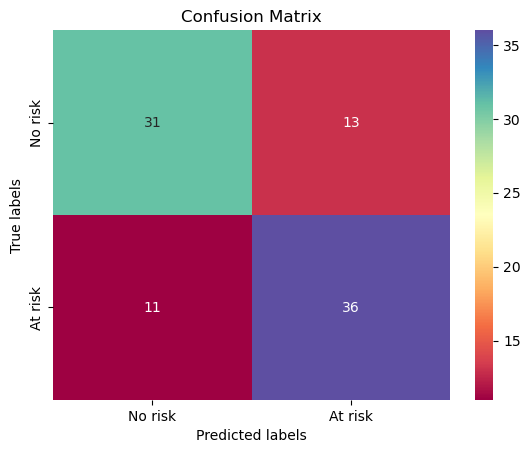

In [34]:
plot_confusion_matrix(Y_test,y_predict)

When using our tuned Decision Tree model to make predictions on our test data, we find that it predicts risk of heart attack at 80.03%,
mking 49 correct predictions out of 61 as shown in the confusion matrix above. This represents a somewhat steep dropoff from our
previous two models, with the biggest issue being false negatives.

## K-Nearest-Neighbors

In [35]:
KNN = KNeighborsClassifier()
knn_params = {'n_neighbors': list(range(1,30)),
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1,2]}

We will tune our K-Neighbors Classifer model by using the knn_params dictionary shown directly above.

- n_neighbors refers to number of neighbors to use by default when searching for similarities.

- algorithm refers to the algorithm used to compute the nearest neighbors.

- p is the power parameter for the Minkowski metric

In [36]:
knn_cv = GridSearchCV(KNN,knn_params,cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [37]:
print("Best Parameters :",knn_cv.best_params_)
print("GridSearch Accuracy :",knn_cv.best_score_)

Best Parameters : {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
GridSearch Accuracy : 0.8257575757575758


The GridSearch tells us the best parameters are 7 for n_neighbors, obtained using the 'auto' option for the algorithm, and 1 for the
Minkowski metric, denoted in our dictionary as p.

- 7 for n_neighbors means that the model will look at the 7 closest neighbors for each test observation in order to find similarities and make its prediction.

- 'auto' for the algorithm parameter means the model will come up with its own algorithm based on the training data provided.

- 1 for p parameter means the Minkowski Distance Metric will be set to 1, or Manhattan Distance. This means the distance between two points is the sum of the absolute differences of their Cartesian coordinates.

In [38]:
y_predict=knn_cv.predict(X_test)

print("K-Neighbors model accuracy:",
    ( accuracy_score(Y_test, y_predict)*100).round(2),'%')

K-Neighbors model accuracy: 82.42 %


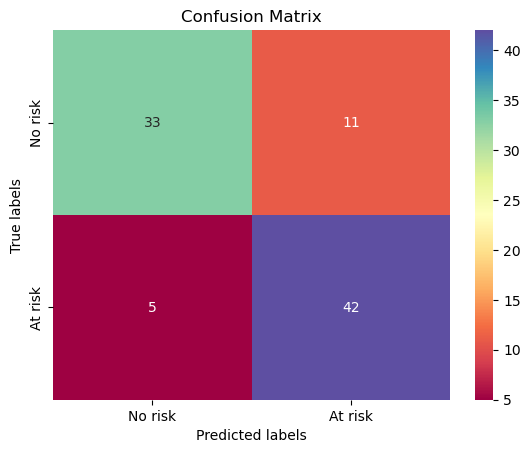

In [39]:
plot_confusion_matrix(Y_test,y_predict)

## Comparisons

In [40]:
mods = {'LogReg':[logreg_cv.best_score_,logreg_cv.score(X_test, Y_test)],'SVM':[svm_cv.best_score_,svm_cv.score(X_test,Y_test)]}
scores = pd.DataFrame.from_dict(mods, orient='index',columns=['Best CV Score','Test Score'])
scores

,Best CV Score,Test Score
LogReg,0.839756,0.846154
SVM,0.830233,0.868132


The best model for prediction whether or not a patient is at risk of heart failure is the K-Nearest-Neighbors model. This optimized
model produced the highest score on the GridSearch using the training set and also had the highest prediction on the unseen test set